In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#CausalImpact 설치
!pip install pycausalimpact
from causalimpact import CausalImpact

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("manjeetsingh/retaildataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/mac/.cache/kagglehub/datasets/manjeetsingh/retaildataset/versions/2


In [8]:
# 다운로드된 파일 목록 출력
files = os.listdir(path)
print("Downloaded files:", files)

Downloaded files: ['Features data set.csv', 'sales data-set.csv', 'stores data-set.csv']


In [16]:
import os
import pandas as pd

# 데이터가 다운로드된 폴더 경로
path = "/Users/mac/.cache/kagglehub/datasets/manjeetsingh/retaildataset/versions/2"  # 실제 경로 확인

# CSV 파일 자동 찾기
csv_files = [file for file in os.listdir(path) if file.endswith('.csv')]

# CSV 파일 로드
dataframes = {}

for file in csv_files:
    file_path = os.path.join(path, file)
    dataframes[file] = pd.read_csv(file_path)
    print(f"\n📌 Loaded: {file}")
    print(dataframes[file].head())

# 원하는 데이터 접근 예시
df_features = dataframes.get('Features data set.csv')
df_sales = dataframes.get('sales data-set.csv')
df_stores = dataframes.get('stores data-set.csv')

display(df_features)
display(df_sales)
display(df_stores)



📌 Loaded: Features data set.csv
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  

📌 Loaded: sales data-set.csv
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [18]:
df_sales['Store'] = df_sales['Store'].astype('category')
df_sales['Dept'] = df_sales['Dept'].astype('string')
df_sales['Date'] = pd.to_datetime(df_sales['Date'], format='%d/%m/%Y')

In [19]:
print ( "총 매장 수:" , df_sales.Store.nunique())
print ( "총 부서 수:" , df_sales.Dept.nunique())

총 매장 수: 45
총 부서 수: 81


In [21]:
df = df_sales.sort_values(by='Date')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
277665,29,5,2010-02-05,15552.08,False
277808,29,6,2010-02-05,3200.22,False
277951,29,7,2010-02-05,10820.05,False
278094,29,8,2010-02-05,20055.64,False


/Users/mac/opt/anaconda3/envs/python-training/lib/python3.10/site-packages/causalimpact/main.py:603: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data.applymap(np.isreal).values.all():
/Users/mac/opt/anaconda3/envs/python-training/lib/python3.10/site-packages/causalimpact/main.py:302: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.mu_sig = (mu[0], sig[0])
/Users/mac/opt/anaconda3/envs/python-training/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/mac/opt/anaconda3/envs/python-training/lib/python3.10/site-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to t

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    46433379.0         789367442.97
Prediction (s.d.)         47268469.61 (1505211.98)803563983.4 (25588603.73)
95% CI                    [44154049.17, 50054371.72][750618835.85, 850924319.29]

Absolute effect (s.d.)    -835090.61 (1505211.98)-14196540.43 (25588603.73)
95% CI                    [-3620992.72, 2279329.83][-61556876.32, 38748607.12]

Relative effect (s.d.)    -1.77% (3.18%)     -1.77% (3.18%)
95% CI                    [-7.66%, 4.82%]    [-7.66%, 4.82%]

Posterior tail-area probability p: 0.29
Posterior prob. of a causal effect: 70.93%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 46433379.0. In the absence of an
intervention, we would have expected an average response of 47268469.61.
The 95% interval of this counterfa

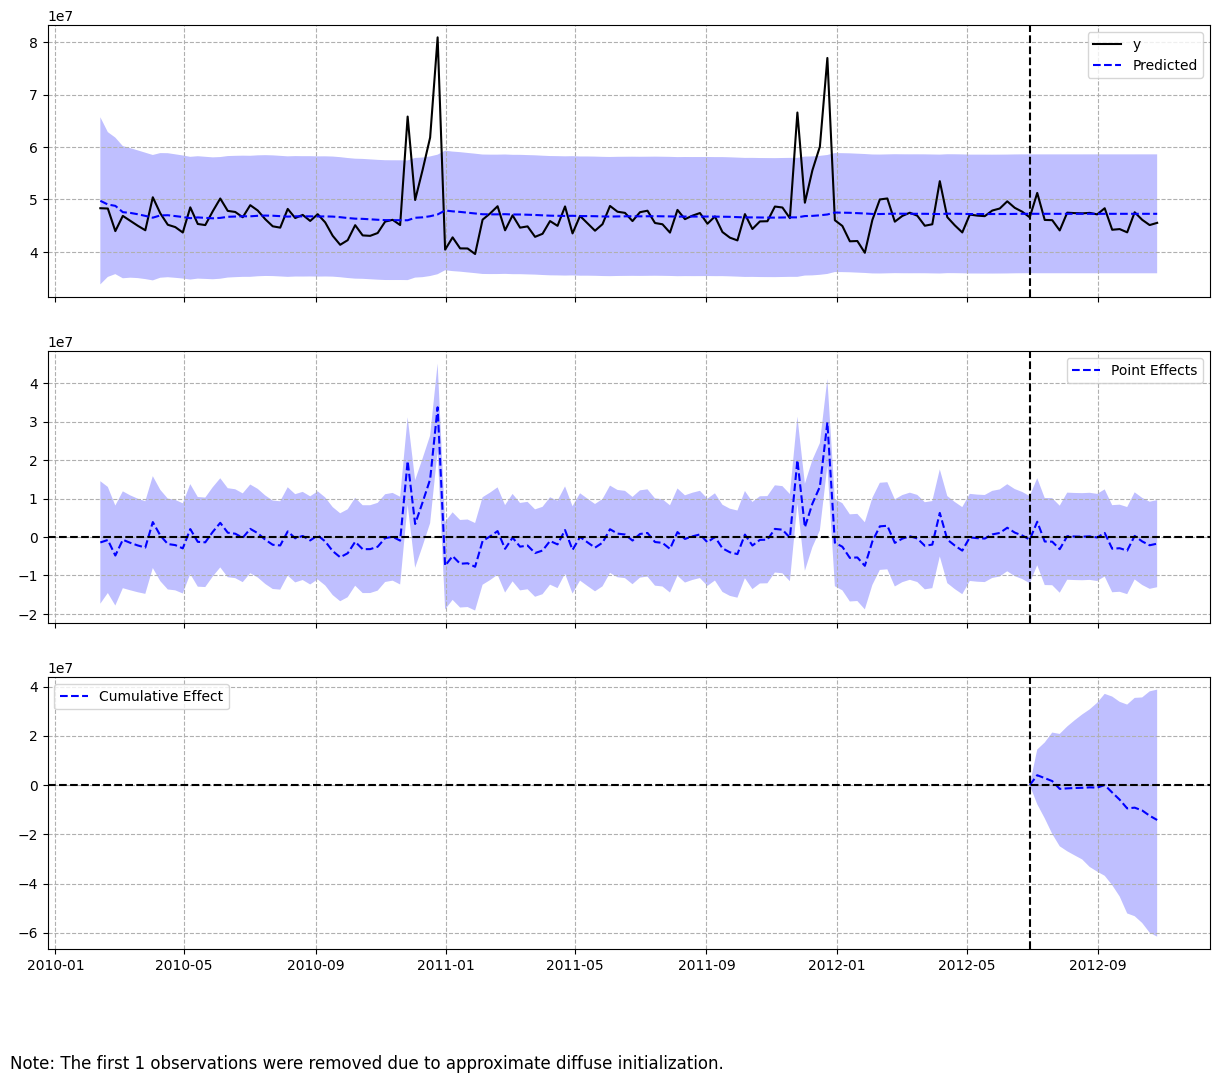

In [24]:
#부서별 매출
df_final = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_final.set_index('Date', inplace=True)

# 마케팅 개입 전후 기간 정의
marketing_pre_period = ['2010-02-05', '2012-06-29'] #마케팅 캠페인 개입 전
marketing_post_period = ['2012-07-06', '2012-10-26']  #마케팅 캠페인 개입 후

# 인과 분석 진행
impact = CausalImpact(df_final, marketing_pre_period, marketing_post_period)

# 인과 분석 결과
print(impact.summary())
print(impact.summary(output='report'))
impact.plot()